### Authencoder

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import sys
sys.path.append("../base_lib")
import functions as func

df = pd.read_csv('../csv/dataset_original.csv')

In [36]:
binary_features = ['GENDER_01', 'LUX_CR', 'Taglia']

# Separare le classi positive e negative
positive_class = df[df['LUX_01'] == 1]
negative_class = df[df['LUX_01'] == 0]

# Divisione dei dati per la classe positiva
X_pos = positive_class.drop(columns=['LUX_01'])
y_pos = positive_class['LUX_01']

# Normalizzazione dei dati
scaler = StandardScaler()
X_pos_scaled = scaler.fit_transform(X_pos)

# Costruzione del MLP regressor
input_dim = X_pos_scaled.shape[1]
mlp_regressor = Sequential([
    Dense(64, input_dim=input_dim, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(input_dim, activation='linear')
])

mlp_regressor.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
mlp_regressor.fit(X_pos_scaled, X_pos_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Generare nuovi campioni della classe positiva
num_new_samples = func.get_strategy_oversampling(len(negative_class), 2/3) - len(positive_class)
new_samples_scaled = mlp_regressor.predict(np.random.rand(num_new_samples, input_dim))
new_samples = scaler.inverse_transform(new_samples_scaled)

# Creare un nuovo DataFrame con i nuovi campioni
new_positive_class = pd.DataFrame(new_samples, columns=X_pos.columns)
new_positive_class['LUX_01'] = 1

# per ogni variabile binaria assegna 1 se il valore è maggiore di 0.5 oppure 0 altrmenti
for col in binary_features:
    new_positive_class[col] = new_positive_class[col].apply(lambda x: round(x) if not (x == 0 or x == 1) else x)

# Combinare i nuovi campioni con il dataset originale
augmented_df = pd.concat([df, new_positive_class], ignore_index=True)

# Shuffle del dataset per mixare le nuove righe
augmented_df = augmented_df.sample(frac=1).reset_index(drop=True)

Epoch 1/50


/home/biso/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 1.0595 - val_loss: 1.1558
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.0299 - val_loss: 1.1366
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0505 - val_loss: 1.1233
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9686 - val_loss: 1.1149
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9832 - val_loss: 1.1096
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.9782 - val_loss: 1.1058
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9422 - val_loss: 1.1024
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9877 - val_loss: 1.0995
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9348 - val_loss: 1.0963
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9212 - val_loss: 1.0928
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9291 - val_loss: 1.0900
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9325 - val_loss: 1.0867
Epoch 13/50


In [37]:
augmented_df

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,...,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_01,LUX_CR
0,1.000000,0,92.933333,15.800000,0,5.000000,2006.000000,-1.000000,3.000000,3.000000,...,3.000000,0.000000,44.000000,16.000000,27.700000,0.000000,-1.000000,-1.000000,0,0
1,7.917698,0,28.084398,37.145199,1,5.344344,2011.561279,1.368853,4.286826,1.044556,...,4.349825,0.495064,44.138191,17.915537,26.338699,0.198595,300.152344,0.136159,1,0
2,5.000000,1,10.066667,30.000000,1,6.000000,2005.000000,-1.000000,3.000000,0.000000,...,4.000000,0.000000,42.000000,7.000000,19.200000,0.000000,-1.000000,-1.000000,0,0
3,3.000000,0,9.200000,40.700000,1,5.000000,2020.000000,-1.000000,6.000000,5.000000,...,5.000000,2.000000,45.000000,10.000000,22.500000,0.000000,-1.000000,-1.000000,0,1
4,3.000000,0,8.733333,41.600000,1,5.000000,2020.000000,-1.000000,6.000000,5.000000,...,5.000000,2.000000,47.000000,15.000000,14.600000,0.000000,-1.000000,-1.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,7.981865,0,25.428637,36.319290,1,5.180884,2012.187988,1.448280,4.355595,0.921179,...,4.228800,0.455623,43.721443,17.724094,27.297447,0.226698,265.255951,0.110639,1,0
4580,10.000000,0,14.300000,27.000000,1,6.000000,2017.000000,-1.000000,5.000000,3.000000,...,4.000000,0.000000,40.000000,25.000000,22.500000,0.000000,-1.000000,-1.000000,0,0
4581,1.000000,0,77.800000,27.000000,1,5.000000,2003.000000,-1.000000,3.000000,3.000000,...,5.000000,0.000000,50.000000,20.000000,31.300000,0.000000,-1.000000,-1.000000,0,0
4582,3.000000,0,12.666667,38.500000,1,5.000000,2018.000000,-1.000000,6.000000,1.000000,...,5.000000,2.000000,45.000000,18.000000,20.500000,0.000000,-1.000000,-1.000000,0,1


In [38]:
augmented_df['LUX_01'].value_counts()

LUX_01
0    3056
1    1528
Name: count, dtype: int64

In [39]:
augmented_df = func.drop_cols(augmented_df)

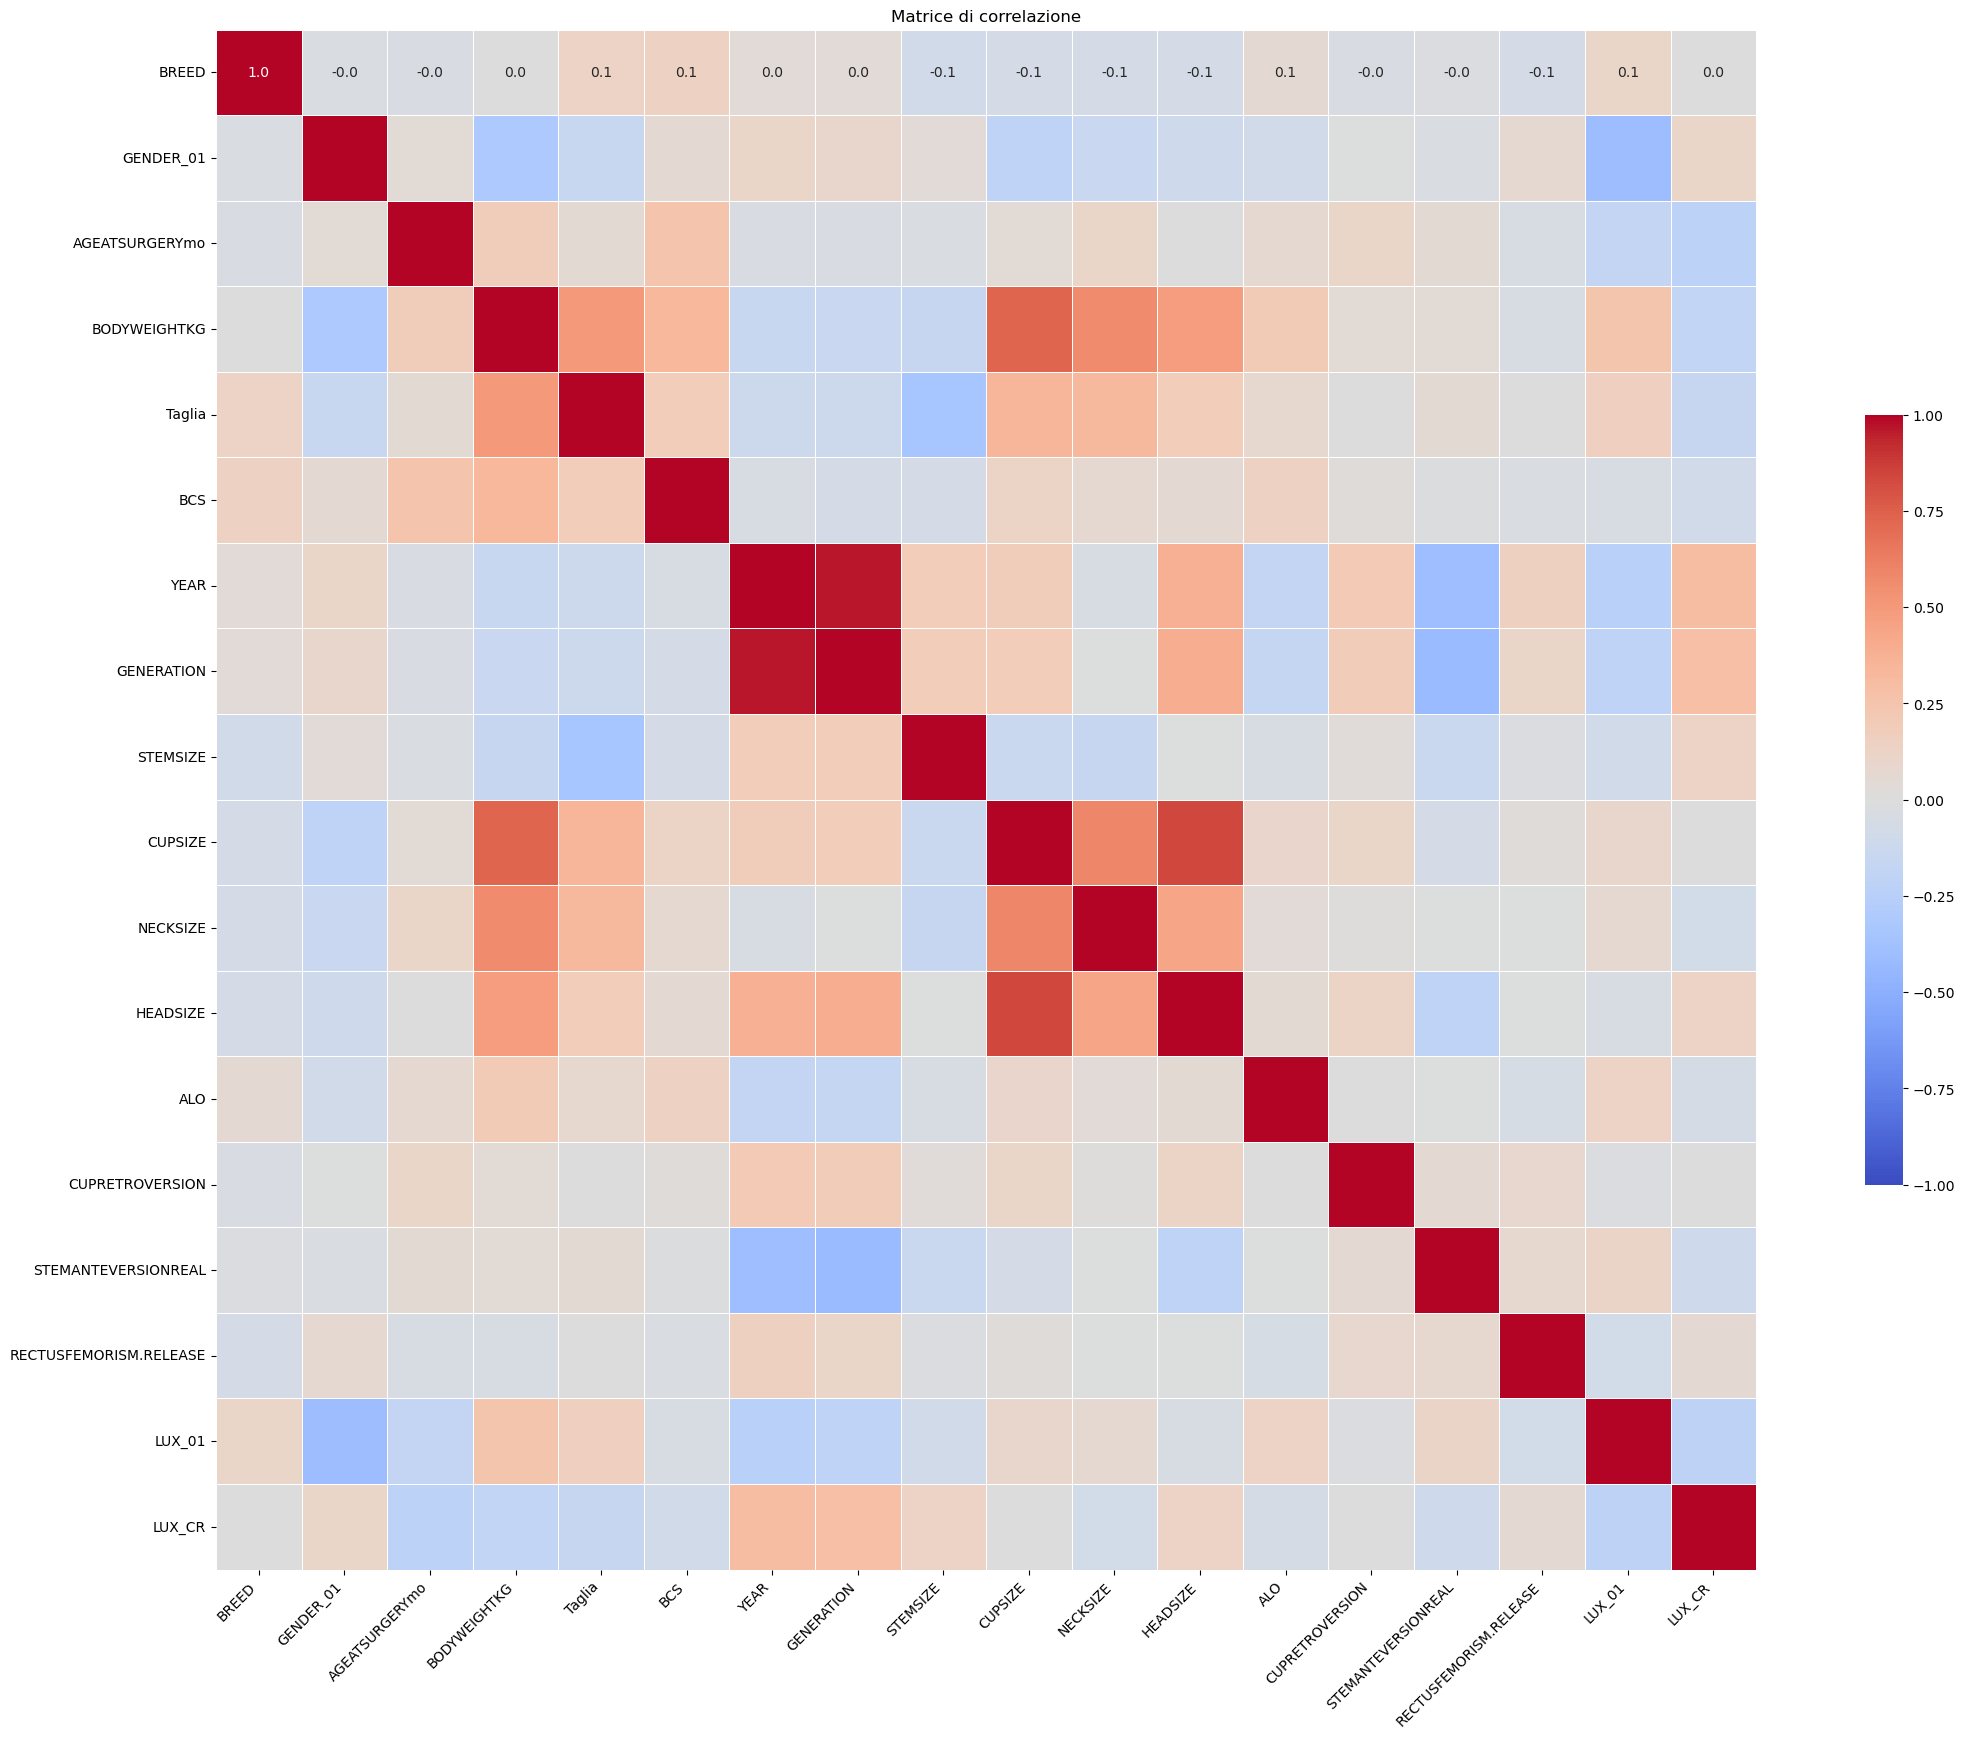

In [40]:
func.diplay_corr_matrix(augmented_df)